# Topological Sort

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import draw_graph, clear_marks

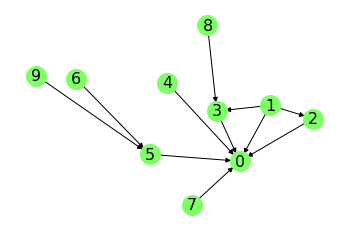

In [2]:
G = nx.gn_graph(10)
G.add_edges_from([(1, 2), (1, 3)])

draw_graph(G)